In [1]:
import inspect

# Algorithmes d'apprentissage

Au coeur de tous les algorithmes d'apprentissage présenté ici, il y a la matrice $Q_{s,a}$, qui est l'estimation relative (à l'algorithme) de chaque couple état-action. Plus la valeur du couple $(etat, action)$ est haute, plus elle est associé à un taux de réussite élevé, et pour un état donné (une ligne de la $Q_{s,a}$ ), la politique optimale associé choisira l'action ayant la valeur la plus haute.

On va ici distinguer deux familles d'algorithmes:
- d'une part la famille des algorithmes de Monte-Carlo, qui fonctionne dans un contexte épisodique, et qui a besoin d'un épisode complet mettre à jour la politique,
- d'autre part la famille des algorithme de Temporal Difference (TD), qui mette à jour al politique à chaque étape de l'épisode

## Methode(s) Monte-carlo

La méthode de **Monte-Carlo** (pour le *Reinforcement Learning*) est l'approche la plus "naïve" qu'on puisse avoir: pour évaluer la qualité d'un état, respectivement d'un couple état-action, on observe le "taux de réussite" de cet état, respectivement du couple état-action, après un épisode complet. 
 A l'issue de suffisement d'épisodes, on a une estimation relative de chaque état, ou couple état-action, à partir de laquelle on peut déduire une politique "optimale".

lien pertinent: https://towardsdatascience.com/monte-carlo-learning-b83f75233f92

**Remarques**:
- Comment faire lorsqu'on ne peut pas partir de chacun des états du système (comme c'est le cas dans *Frozen-Lake*)?
- D'une certaine manière, on "se fiche" de comment l'agent parcours les états, seul l'observation des trajectoires comptent
- Instinctivement, pour éviter de biaiser le parcours de l'agent, on peut utiliser une politique uniformément aléatoire (lors de la phase d'apprentissage)
- Avec le constat précédent, on peut simplement paramétrer un algoritme de Monte Carlo avec comme seul paramètre le nombre d'itération

In [2]:
with open("Monte_Carlo.py", 'r', encoding='utf-8') as the_file:
    print(the_file.read())

from src.V2.Classes.Policy import Policy
from src.V2.Classes.Agent import Agent

import numpy as np
import random

# Generic Initialisation
def MC(environment, epoch_number = 8000):
    # Get the observation space & the action space
    environment_space_length: int = environment.observation_space.n # type: ignore
    action_space_length: int = environment.action_space.n # type: ignore
    Q_sa = np.zeros((environment_space_length, action_space_length))
    incremental_counter = np.zeros((environment_space_length, action_space_length))
    random_policy = Policy(
        lambda agent, state: 
            random.randint(0, action_space_length - 1)
        ,
        environment_space_length,
        action_space_length
    )
    def update_MC(agent: Agent):
        # All the (state, action) pair got updated with the last reward of the run
        final_value = agent.trajectory.steps[-1].reward
        for step in agent.trajectory.steps:
            increment = incremental_counter[step.st

## Temporal Difference (TD)

Contrairement aux algoritmes "Monte Carlo", les algorithmes TD mettent à jour leur politique à chaque étape de chaque épisode.

**Remarques:**
- J'ai trouvé beaucoup de contradiction dans les définitions de *on-policy* et *off-policy*, celles que j'ai utilisée sont la version de wikipedia (et découle de l'observation des méthodes de mise à jour)
- pour ces algorithmes, on aura typiquement 4 paramètres: le nombre d'itération, le facteur d'apprentissage $\alpha$, le facteur d'actualisation $\gamma$ et $\epsilon$ le facteur d'exporation de la politique $\epsilon$*-greedy*

### SARSA

L'algorithme **SARSA** tire son nom de sa méthode d'apprentissage, qui signifie *State-Action-Reward-State-Action*: à chaque pas de l'algorithme, c'est à dire à chaque fois qu'un agent choisi une action, on va mettre à jour la matrice $Q_{s, a}$ en fonction de l'était de départ, l'action choisi par la politique, la récompense fournit par l'environnement, mais également l'action suivante à l'état suivant choisi par la politique en cours. L'amélioration de $Q_{s, a}$ peut donc s'écrire comme la fonction suivante: $update\_SARSA(State_n, Action_n, Reward_n, State_{n+1}, Action_{n+1})$.

Puisque que la fonction d'amélioration dépend de l'action $Action_{n+1}$, elle même déterminée par la politique en cours, on dit qu'il s'agit d'un algorithme *on-policy*.

In [3]:
with open("SARSA.py", 'r', encoding='utf-8') as the_file:
    print(the_file.read())

from typing import Callable
import gymnasium as gym
from nptyping import Float, NDArray, Shape
import numpy as np

from src.V2.Classes.Policy import Policy
from src.V2.Classes.Agent import Agent
from src.V2.Functions.epsilon_greedy_policy_factory import make_epsilon_greedy_policy

def SARSA(environment, epsilon = 0.1, alpha = 0.1, gamma = 0.99, epoch_number = 8000):
    # Get the observation space & the action space
    environment_space_length: int = environment.observation_space.n # type: ignore
    action_space_length: int = environment.action_space.n # type: ignore
    Q_sa = np.zeros((environment_space_length, action_space_length))

    epsilon_greedy_policy = Policy(
        make_epsilon_greedy_policy(epsilon = epsilon, Q_sa = Q_sa),
        environment_space_length,
        action_space_length
    )
    def update_SARSA(agent: Agent, state_index: int, action_index: int, next_state: int, next_action: int,  reward:float = 0.0):
        # Q[s, a] := Q[s, a] + α[r + γQ(s', a') - Q(s

### Q-learning

L'algorithme **Q_learning** ressemble beaucoup à l'algorithme **SARSA**: comme lui il va mettre à jour la matrice $Q_{s, a}$. L'amélioration de $Q_{s, a}$ peut s'écrire comme la fonction suivante: $update\_Qlearning(State_n, Action_n, Reward_n, State_{n+1})$.

Contrairement à la fonction d'almélioration de **SARSA**, on voit que celle de **Q_learning** ne dépend pas de l'action $Action_{n+1}$: elle ne dépend donc pas de la politique utilisé, et on parlera alors d'un algorithme *off-policy*.

In [4]:
with open("Q_learning.py", 'r', encoding='utf-8') as the_file:
    print(the_file.read())

import gymnasium as gym
import numpy as np

from src.V2.Classes.Policy import Policy
from src.V2.Classes.Agent import Agent
from src.V2.Functions.epsilon_greedy_policy_factory import make_epsilon_greedy_policy

def Q_learning(environment, epsilon = 0.1, alpha = 0.1, gamma = 0.99, epoch_number = 8000):
    # Get the observation space & the action space
    environment_space_length: int = environment.observation_space.n # type: ignore
    action_space_length: int = environment.action_space.n # type: ignore
    Q_sa = np.zeros((environment_space_length, action_space_length))

    epsilon_greedy_policy = Policy(
        make_epsilon_greedy_policy(epsilon = epsilon, Q_sa = Q_sa),
        environment_space_length,
        action_space_length
    )
    def update_Qlearning(agent: Agent, state_index, action_index, next_state, reward: float = 0):
        # Q[s, a] := Q[s, a] + α[r + γ . argmax_a {Q(s', a')} - Q(s, a)]
        best_next_action = np.argmax(Q_sa[next_state, ])
        Q_sa[state_i

# Comparaisons, convergence et métrique

Les temps de calcul des algorithmes seront générallement "long", on voudrait alors savoir quand s'arrêter avec un résultat (*i.e* une politique optimale estimée) qui converge. Avant de se lancer dans une longue période d'apprentissage, on aimerait choisir judicieusement les paramètres de notre algorithme.

**Remarques:**
- La lecture de littérature sur le sujet peut donner une bonne idée de paramètres "non-déconnants", ou d'une plage de valeur pertinente
- Ici, j'aurai une approche naïve, et je choisirais ces paramètres uniquement via l'exploitation des algorithmes précédents

## Grille

Pour essayer de me faire une idée du comportement de chaque algorithme en fonction de ses paramètre, l'approche "naïve" est de faire une grille sur l'espace des paramètres. Les valeurs possibles pour $\alpha$, $\gamma$ et $\epsilon$ sont toutes dans l'intervalle $[0, 1]$, et les valeurs pour le nombre d'estimation sont les entiers positifs.

In [5]:
with open("parameter_grid.py", 'r', encoding='utf-8') as the_file:
    print(the_file.read())

import random
import gymnasium as gym
import numpy as np
import json

from SARSA import SARSA
from Q_learning import Q_learning

from src.V2.Classes.Policy import Policy
from src.V2.Classes.Agent import Agent
from src.V2.Functions.run import run_static

#    ____             _                     _____             __ _                       _   _             
#   |  _ \           | |                   / ____|           / _(_)                     | | (_)            
#   | |_) | __ _  ___| | ___   _ _ __     | |     ___  _ __ | |_ _  __ _ _   _ _ __ __ _| |_ _  ___  _ __  
#   |  _ < / _` |/ __| |/ / | | | '_ \    | |    / _ \| '_ \|  _| |/ _` | | | | '__/ _` | __| |/ _ \| '_ \ 
#   | |_) | (_| | (__|   <| |_| | |_) |   | |___| (_) | | | | | | | (_| | |_| | | | (_| | |_| | (_) | | | |
#   |____/ \__,_|\___|_|\_\\__,_| .__/     \_____\___/|_| |_|_| |_|\__, |\__,_|_|  \__,_|\__|_|\___/|_| |_|
#                               | |                                 __/ |                         

**Remarque:** Effectuer les calculs pour toute la grille prend du temps => on sauvegarde à chaque nouveau modèle testé les résultats dans un fichier.

## Comparaison

L'approche la plus naïve et direct pour comparer les réusltats lors de la phase d'apprentissage sont les résultats obtenue lors de la phase de test correspondante avec les paramètres appris (ici, ce sera toujours la matrice $Q_{s, a}$).

Les objectifs de ces comparaisons sont multiples: quel jeux de paramètres choisir pour optimiser la convergence vers la **meilleur** matrice $Q_{s, a}$ ? Comment savoir si on a suffisement appris ? Quelle est la sensibilité de notre algorithme aux paramètres ? Quel algorithme choisir pour notre problème ?

**Attention:** Il est facile de commettre l'erreur d'évaluer notre méthode en se basant sur la politique d'apprentissage. Il faut en effet l'évaluer lors d'une phase de test sur la politique **optimal**, ici déterministe, qui sera construite *a priori* avec la matrice $Q_{s, a}$. Pour concrétiser la différence entre les deux: si je mettrais un paramètre $\epsilon = 1$, est ce qu'on verrait une quelconque amélioration si on testerais cette même politique ? N'ai je "rien appris" pour autant ?

### Monte-Carlo

L'algorithme d'apprentissage de Monte-Carlo implémenté est très simpliste, et peut largement être amélioré. Le seul paramètre de l'algoirthme est ici le nombre d'étape lors de la phase d'apprentissage, et le graphique suivant illustre l'évolution du taux de réussite lors de la phase de test en fonction de ce nombre d'étape.



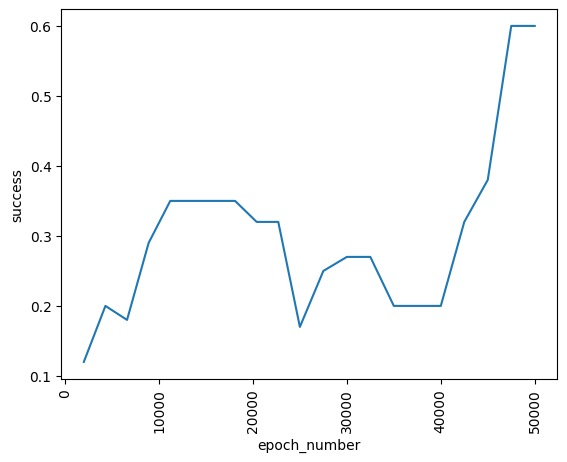

In [8]:
import json
import pandas as pd
import seaborn
results = []

with open("data/mc_grid_final.json", 'r') as the_file:
    results += json.loads(the_file.read())
                          
big_df = pd.DataFrame(results)
seaborn.lineplot(big_df, x = "epoch_number", y= "success").tick_params(axis='x', rotation=90)

On observe que l'algorithme semble converger vers un taux de réussite de 0.6, mais qu'il lui faut "beaucoups" de temps. En optimisant la politique d'apprentissage, on pourrait certainement gagner un temps "considérable".

**Remarque:** Il n'y a qu'une seule observation par valeur du paramètre **epoch_number**, mais cette valeur est le taux de réussite sur 100 test. On pourrait augmenter la taille de l'échantillon de test si on voulait être un peu plus "sur" de la valeur retourner, mais...

**Rappel** Lors de chaque phas de test, l'aléatoire est remis à zéros, donc on observe bien la manière dont se comporte la politique final (= de test) **en faisant abstraction du hasard intrinsèque**.

### Algorithmes DT

Les algorithmes SARSA et Q-learning étant tous les deux de la même catégorie, avec les mêmes jeux de paramètres, on peut effectuer la comparaison entre eux, et utiliser une grille de paramètres communes. Cela peut permettre par exemple de décider quel algorithme utiliser entre les deux.



In [9]:
results = []

with open("data/fat_grid_2.json", 'r') as the_file:
    results += json.loads(the_file.read())
                          
big_df = pd.DataFrame(results)

Contrairement à la méthode de Monte Carlo étudié précedemment, on a ici 4 paramètres a testé/évalué/comprendre. Dans un premier temps, on peut réaliser une approche **univarié**, c'est à dire regarder l'impact du taux de réussite en faisant varier un seul parmètre.

En amalgamant sur l'ensemble des autres paramètres, on peut tracer le graphique d'une boîte à moustache (*boxplot*) de l'évolution du taux de réussite en fonction du paramètre d'intérêt.

**Remarque:** Une boîte à moustache représente la distribution "synthétique" d'une variable par rapport à une autre. Ainsi la barre centrale représente la médiane, et les autres barres délimitent les quartiles de la distribution, les points à l'extérieur étant supposé des *outliers* (foncièrement faux dans notre cas, car le taux de succès n'est pas une variable observée sur laquelle on pourrait faire une erreur de mesure).

Pour le nombre d'*epoch* lors de l'apprentissage:

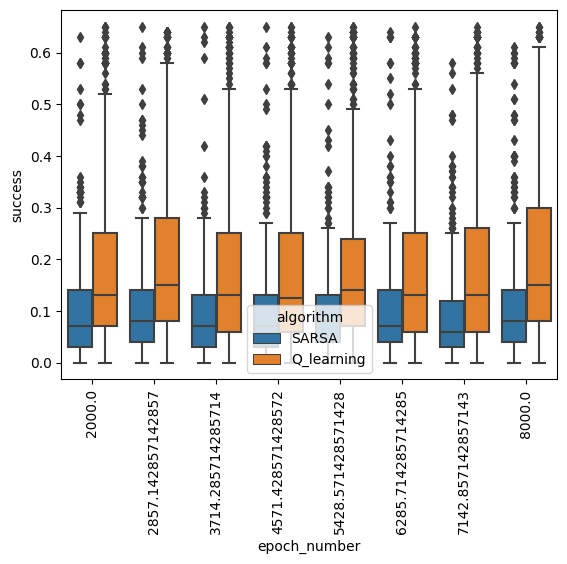

In [13]:
seaborn.boxplot(data=big_df, x="epoch_number", y="success", hue="algorithm").tick_params(axis='x', rotation=90)

On remarque deux faits:
 - Q-learning semble systématiquement avoir de meilleur résultats que SARSA
 - le paramètre du nombre d'*epoch* ne parait pas très significatif, en tout cas sur la plage de valeurs observé (entre 2000 et 8000). Des tests statistiques plus approfondies pourraient déterminer si tel est le cas, ou non.

 Pour le paramètre $\epsilon$:

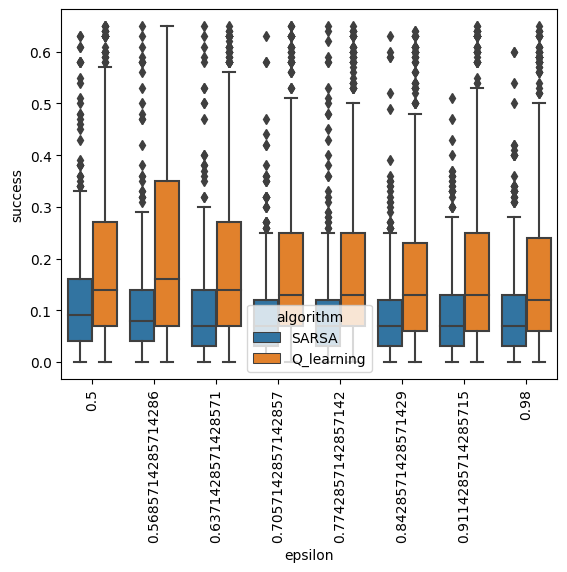

In [12]:
seaborn.boxplot(big_df, x = "epsilon", y= "success", hue='algorithm').tick_params(axis='x', rotation=90)

On remarque deux faits:
 - Q-learning semble systématiquement avoir de meilleur résultats que SARSA
 - le paramètre $\epsilon$ ne parait pas très significatif, en tout cas sur la plage de valeurs observé (entre 0.5 et 0.98). Des tests statistiques plus approfondies pourraient déterminer si tel est le cas, ou non.

 Pour l

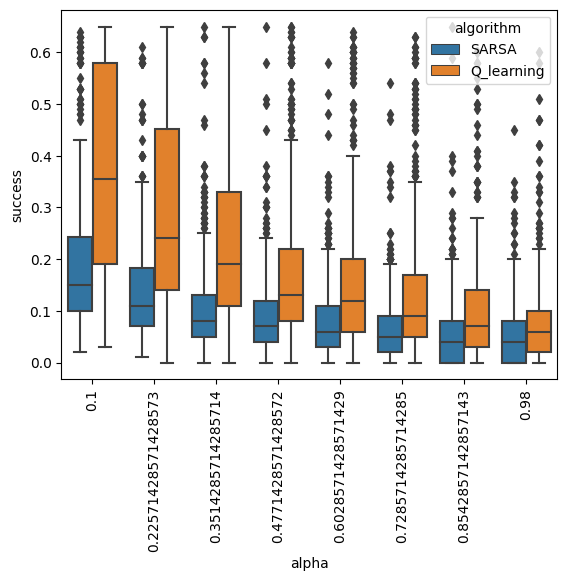

In [14]:
seaborn.boxplot(big_df, x = "alpha", y= "success", hue='algorithm').tick_params(axis='x', rotation=90)

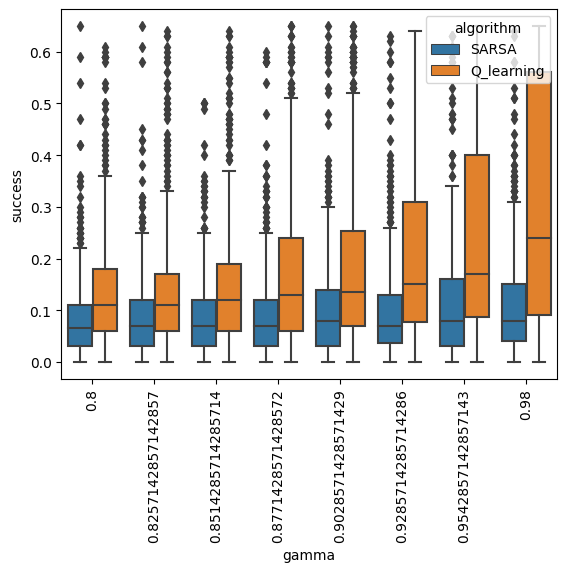

In [15]:
seaborn.boxplot(big_df, x = "gamma", y= "success", hue='algorithm').tick_params(axis='x', rotation=90)